In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')

In [10]:
display (red_wine.head())
display(red_wine.info())
display(red_wine.shape)

# Note: the 'quality' rating is always an integer!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

(1599, 12)

In [5]:
red_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
red_wine.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [11]:
# Create new column 'quality_label' based on value of 'quality'.

red_wine['quality_label']= red_wine['quality'].apply(lambda val: 'low' if val <=5 else 'medium' if val <= 7 else 'high')

# Convert 'quality_label' into 'categorical' data type. 

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories = ['low', 'medium', 'high'])


In [9]:
display(white_wine.head())
display(white_wine.isna().sum())
display(white_wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
# Create new column, 'quality_label'.   # Note, the quality is always an integer.
# 0 =< quality  <= 5: 'low'
# 6 =< quality <=7: 'medium'
# 8 =< quality <= 10: 'high'

white_wine['quality_label'] = white_wine['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories = ['low', 'medium', 'high'])

In [12]:
# Add wine_type column
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [11]:
# Concatenate red and white wines into single dataframe
wines = pd.concat([red_wine, white_wine])

In [12]:
wines.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,red


In [13]:
# Shuffle the dataset so the whites and reds are randomly distributed. 

# reset_index –> Assign new numbers (from 0 to n) for indices; drop = True –> remove old indices
# DataFrame.sample(frac = float) –> Return randomised sample (size determined by 'frac' param)
# random_state = seed for pseudo random number generator

wines = wines.sample(frac=1, random_state = 42).reset_index(drop = True)

In [14]:
wines.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white


In [15]:
# Create new dataframes with summary stats for selected columns:

red_wine_stats = red_wine.describe()[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']].round(2)
white_wine_stats = white_wine.describe()[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']].round(2)

In [16]:
display(red_wine_stats.head())
display(white_wine_stats.head())

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,2.54,46.47,0.66,10.42,0.53,5.64
std,1.41,32.90,0.17,1.07,0.18,0.81
min,0.90,6.00,0.33,8.40,0.12,3.00
25%,1.90,22.00,0.55,9.50,0.39,5.00


,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.39,138.36,0.49,10.51,0.28,5.88
std,5.07,42.50,0.11,1.23,0.10,0.89
min,0.60,9.00,0.22,8.00,0.08,3.00
25%,1.70,108.00,0.41,9.50,0.21,5.00


In [17]:
# Concatenate the two stats tables to get a better overview

# axis = 1 –> concatenate along the columns

wines_stats = pd.concat([red_wine_stats, white_wine_stats], axis = 1, keys = ['Red Wine Statistics', 'White Wine Statistics'])
wines_stats

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [18]:
wines_stats

# Mean residual sugar and total sulfur dioxide = higher in white wine.
# Mean sulphates, volatile acidity = higher in red wine.

# std for residual sugar much higher in white wine.
# std for total sulfur dioxide much higher in white wine. 
# std for sulphates slightly higher in red wine.

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

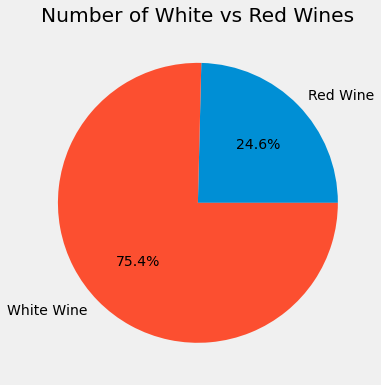

In [19]:
# Create pie chart to compare total number of white vs red wines

labels = ['Red Wine', 'White Wine']
values = [len(red_wine), len(white_wine)]

plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,6))
plt.pie(values, labels = labels, autopct = "%1.1f%%")
plt.title('Number of White vs Red Wines')
plt.show()

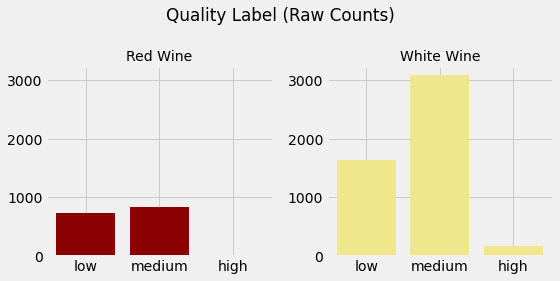

In [20]:
""" Plot distribution of quality labels for red and white wines."""

""" This is using the 'longer' method of
 plt.figure()
 ax = plt.subplot()                         """

red_wine_by_quality = red_wine.groupby('quality_label').count().iloc[:,0]
white_wine_by_quality = white_wine.groupby('quality_label').count().iloc[:,0]

plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,4))
plt.suptitle('Quality Label (Raw Counts)')

ax = plt.subplot(1,2,1)
plt.bar(x = red_wine_by_quality.index, height = red_wine_by_quality.values, color = 'DarkRed')
plt.title('Red Wine', fontsize = 14)

plt.subplot(1,2,2, sharey = ax)
plt.bar(x = white_wine_by_quality.index, height = white_wine_by_quality.values, color = 'Khaki')
plt.title('White Wine', fontsize = 14)

plt.tight_layout()
plt.show()





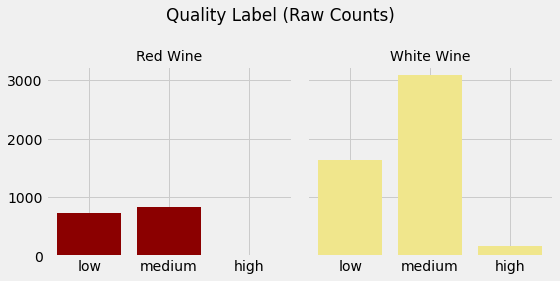

In [21]:
"""
Same as above, but using the 'quicker'
fig, ax = plt.subplots() method
"""

red_wine_by_quality = red_wine.groupby('quality_label').count().iloc[:,0]
white_wine_by_quality = white_wine.groupby('quality_label').count().iloc[:,0]

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1,2, figsize = (8,4), sharey = True)
plt.suptitle('Quality Label (Raw Counts)')

ax[0].bar(x = red_wine_by_quality.index, height = red_wine_by_quality.values, color = 'DarkRed')
ax[0].set_title('Red Wine', fontsize = 14)

ax[1].bar(x = white_wine_by_quality.index, height = white_wine_by_quality.values, color = 'Khaki')
ax[1].set_title('White Wine', fontsize = 14)

plt.tight_layout()
plt.show()

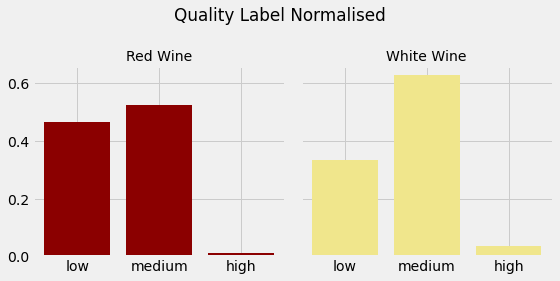

In [22]:
"""
Same as above, but normalise first. 
"""

red_wine_by_quality = red_wine.groupby('quality_label').count().iloc[:,0]
white_wine_by_quality = white_wine.groupby('quality_label').count().iloc[:,0]


# Normalise red wine values
red_x = red_wine_by_quality.index
red_y = list(red_wine_by_quality.values)
red_y_sum = sum(red_y)
red_y_norm = [val / red_y_sum for val in red_y]

# Normalise white wine values
white_x = white_wine_by_quality.index
white_y = list(white_wine_by_quality.values)
white_y_sum = sum(white_y)
white_y_norm = [val / white_y_sum for val in white_y]


plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1,2, figsize = (8,4), sharey = True)
plt.suptitle('Quality Label Normalised')

ax[0].bar(x = red_x, height = red_y_norm, color = 'DarkRed')
ax[0].set_title('Red Wine', fontsize = 14)

ax[1].bar(x = white_x, height = white_y_norm, color = 'Khaki')
ax[1].set_title('White Wine', fontsize = 14)

plt.tight_layout()
plt.show()

# Vast majority (over 80%) of red wines are of 'medium' quality.
# A higher proportion of red wines (around 17%) are of 'high' quality
# Only a tiny proportion of white wines are of 'high' quality
# Relatively high (almost 40%) of white wines are of 'low' quality.

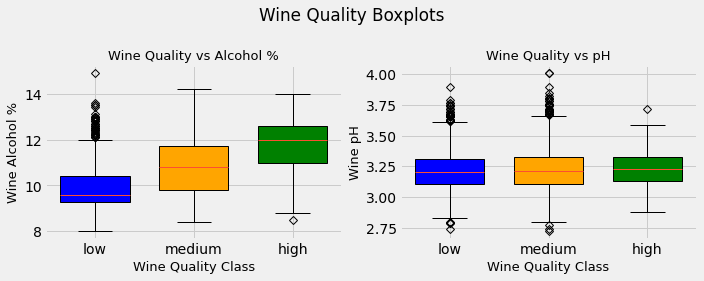

In [23]:
"""
Create two boxplots as subplots on same row
On left: wine quality vs alcohol
 On right: wine quality vs pH 

This is using the 'slow' method:
plt.figure()
ax = plt.subplot()
"""


# Create three new dataframes by quality
wines_low = wines[wines['quality_label'] == 'low']
wines_medium = wines[wines['quality_label'] == 'medium']
wines_high = wines[wines['quality_label'] == 'high']

plt.figure(figsize = (10,4))
plt.suptitle('Wine Quality Boxplots')

plt.subplot(1,2,1)                                                  # First boxplot: wine quality vs alcohol
bp1 = plt.boxplot([wines_low['alcohol'], wines_medium['alcohol'], 
                    wines_high['alcohol']], patch_artist = True, 
                    labels = ['low', 'medium', 'high'],
                    widths = 0.7)                                   # Note that you save the boxplot as variable bp1.
                                                                    # Also note: you need to set patch_artist = True if 
                                                                    # you want to fill the boxes with colour.



# Now fill the three patches of the boxplot with colours:
colors = ['blue', 'orange', 'green']                
for patch, color in zip (bp1['boxes'], colors):                     # bp1 is a dictionary that has keyword 'boxes' (among others)
    patch.set_facecolor(color)                                      # For each 'patch' (box), fill with a colour.

# Customise flier style
for flier in bp1['fliers']:                                         # bp1 is a dictionary that hs keyword 'fliers'
    flier.set(marker = 'D')

plt.xlabel('Wine Quality Class', fontsize = 13)
plt.ylabel('Wine Alcohol %', fontsize = 13)
plt.title('Wine Quality vs Alcohol %', fontsize = 13)               # Set labels and title

plt.subplot(1,2,2)                                                  # Second boxplot: wine quality vs pH
bp2 = plt.boxplot([wines_low['pH'], wines_medium['pH'], wines_high['pH']], 
                    patch_artist = True, 
                    labels = ['low', 'medium', 'high'],
                    widths = 0.7)
for patch, color in zip (bp2['boxes'], colors):
    patch.set_facecolor(color)

for flier in bp2['fliers']:
    flier.set(marker = 'D')

plt.xlabel('Wine Quality Class', fontsize = 13)
plt.ylabel('Wine pH', fontsize = 13)
plt.title('Wine Quality vs pH', fontsize = 13)

plt.tight_layout()
plt.show()


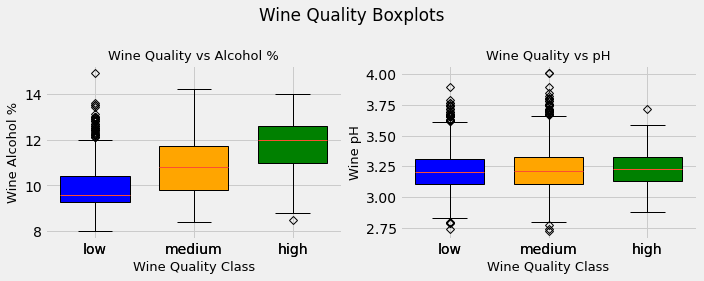

In [24]:
"""
Create two boxplots as subplots on same row
On left: wine quality vs alcohol
 On right: wine quality vs pH 

This is using the 'fast' method:
fig, ax = plt.subplots()
etc
"""


# Create three new dataframes by quality
wines_low = wines[wines['quality_label'] == 'low']
wines_medium = wines[wines['quality_label'] == 'medium']
wines_high = wines[wines['quality_label'] == 'high']

fig, ax = plt.subplots(1, 2, sharex = True, figsize = (10,4))
plt.suptitle('Wine Quality Boxplots')


# First boxplot: wine quality vs alcohol
# Note that you save the boxplot as variable bp1.
# Also note: you need to set patch_artist = True if 
# you want to fill the boxes with colour.
bp1 = ax[0].boxplot([wines_low['alcohol'], wines_medium['alcohol'], 
                    wines_high['alcohol']], patch_artist = True, 
                    labels = ['low', 'medium', 'high'],
                    widths = 0.7)


# Now fill the three patches of the boxplot with colours:
# bp1 is a dictionary that has keyword 'boxes' (among others)
# For each 'patch' (box), fill with a colour.
colors = ['blue', 'orange', 'green']                
for patch, color in zip (bp1['boxes'], colors):                     
    patch.set_facecolor(color)                                      

# Customise flier style
# bp1 is a dictionary that hs keyword 'fliers'
for flier in bp1['fliers']:                                         
    flier.set(marker = 'D')

# Set labels and title
ax[0].set_xlabel('Wine Quality Class', fontsize = 13)
ax[0].set_ylabel('Wine Alcohol %', fontsize = 13)
ax[0].set_title('Wine Quality vs Alcohol %', fontsize = 13)

# Second boxplot: wine quality vs pH
bp2 = ax[1].boxplot([wines_low['pH'], wines_medium['pH'], wines_high['pH']], 
                    patch_artist = True, 
                    labels = ['low', 'medium', 'high'],
                    widths = 0.7)

for patch, color in zip (bp2['boxes'], colors):
    patch.set_facecolor(color)

for flier in bp2['fliers']:
    flier.set(marker = 'D')

ax[1].set_xlabel('Wine Quality Class', fontsize = 13)
ax[1].set_ylabel('Wine pH', fontsize = 13)
ax[1].set_title('Wine Quality vs pH', fontsize = 13)

plt.tight_layout()
plt.show()


In [25]:
# We see that the pH level stays relatively consistent across the quality classes.
# But the high-quality wines tend to have a higher alcohol content. 
# (Did faster intoxication make the wine 'experts' to judge more favourably?)


In [26]:
wines.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white


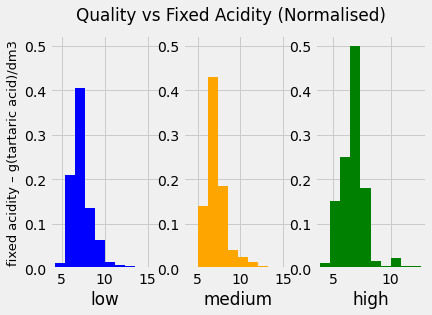

In [27]:
"""
Create histograms for fixed acidity

Using 'slow' method:
plt.figure()
ax = plt.subplot() etc
"""

wines_low = wines[wines['quality_label'] == 'low']
wines_medium = wines[wines['quality_label'] == 'medium']
wines_high = wines[wines['quality_label'] == 'high']

plt.figure()
plt.suptitle('Quality vs Fixed Acidity (Normalised)')

ax = plt.subplot(1,3,1)
plt.hist(wines_low['fixed acidity'], density = True, color = 'blue')            # density = True (to normalise)
plt.xlabel('low')
plt.ylabel('fixed acidity – g(tartaric acid)/dm3', fontsize = 13)

plt.subplot(1,3,2, sharey = ax)
plt.hist(wines_medium['fixed acidity'], density = True, color = 'orange')
plt.xlabel('medium')

plt.subplot(1,3,3, sharey = ax)
plt.hist(wines_high['fixed acidity'], density = True, color = 'green')
plt.xlabel('high')


plt.show()





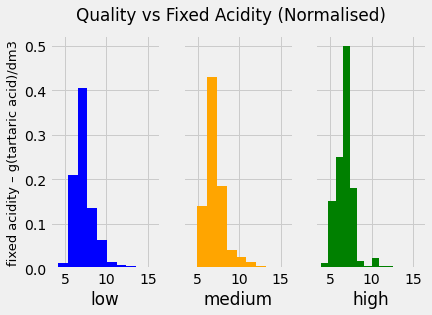

In [28]:
"""
Create histograms for fixed acidity

Using 'fast' method:
fig, ax = plt.subplots() etc

"""

wines_low = wines[wines['quality_label'] == 'low']
wines_medium = wines[wines['quality_label'] == 'medium']
wines_high = wines[wines['quality_label'] == 'high']

fig, ax = plt.subplots(1,3, sharey = True, sharex = True)       # Keep same range for x and y axes.
plt.suptitle('Quality vs Fixed Acidity (Normalised)')

ax[0].hist(wines_low['fixed acidity'], density = True, color = 'blue')  # density = True (to normalise)
ax[0].set_xlabel('low')
ax[0].set_ylabel('fixed acidity – g(tartaric acid)/dm3', fontsize = 13)

ax[1].hist(wines_medium['fixed acidity'], density = True, color = 'orange')
ax[1].set_xlabel('medium')

ax[2].hist(wines_high['fixed acidity'], density = True, color = 'green')
ax[2].set_xlabel('high')


plt.show()

In [29]:
### Interesting. The high-quality wines are more positively skewed.

In [30]:
# Create function to create histograms


def plot_histograms(feature):
    wines_low = wines[wines['quality_label'] == 'low']
    wines_medium = wines[wines['quality_label'] == 'medium']
    wines_high = wines[wines['quality_label'] == 'high']

    feature_units = {'fixed acidity': 'g(tartaricacid)/dm3',
                        'volatile acidity': 'g(aceticacid)/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g(sodiumchloride)/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g(potassiumsulphate)/dm3',
                        'alcohol': '%'
                        }

    fig, ax = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (12,4))
    plt.figure(figsize = (12,4))
    fig.suptitle(f'Quality vs {feature.title()} (Normalised)')

    ax[0].hist(wines_low[feature], density = True, color = 'blue')
    ax[0].set_xlabel('low')
    ax[0].set_ylabel(f'{feature.title()} – {feature_units[feature].title()}', fontsize = 13)

    ax[1].hist(wines_medium[feature], density = True, color = 'orange')
    ax[1].set_xlabel('medium')

    ax[2].hist(wines_high[feature], density = True, color = 'green')
    ax[2].set_xlabel('high')
    
    plt.show()

### I don't think the function is normalising correctly. 
### Check again and then talk to Ottavia.
###
### Also, I want the x axis to stay consistent across all subplots.
###
###

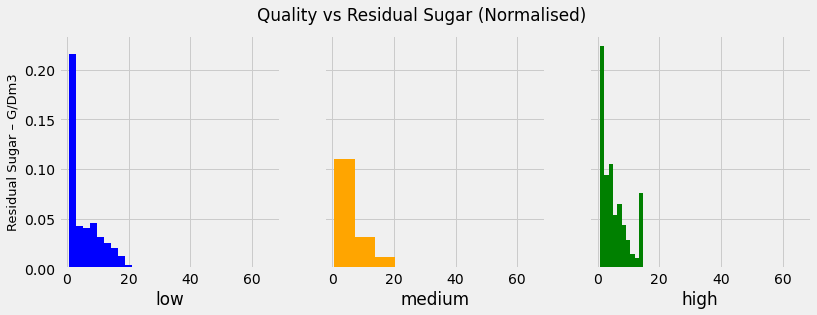

<Figure size 864x288 with 0 Axes>

In [31]:
plot_histograms('residual sugar')

### In the plot we have an artificially large x range for the 'medium' quality wines.
### This is because the 'medium' quality wines includes 
### one example with residual sugar = 65.80 (see cell below)

In [32]:
wines_medium['residual sugar'].value_counts().sort_index()

0.70       2
0.80       8
0.90      27
1.00      48
1.10     100
        ... 
20.70      2
20.80      2
26.05      2
31.60      2
65.80      1
Name: residual sugar, Length: 269, dtype: int64

In [33]:
"""
Create a list of all features (without 'quality', 'quality_label', 'wine_type')
"""

features = list(wines.columns)
features.remove('quality')
features.remove('quality_label')
features.remove('wine_type')
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

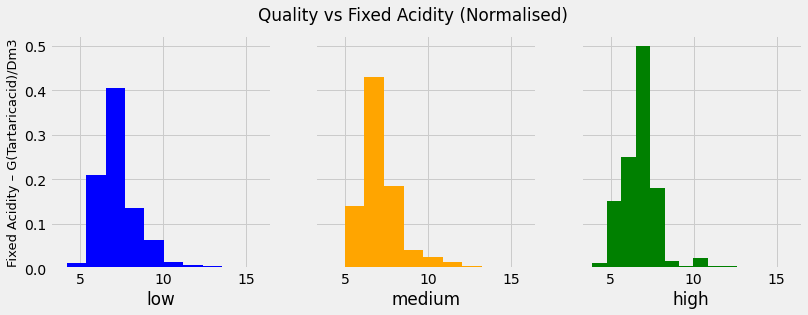

<Figure size 864x288 with 0 Axes>

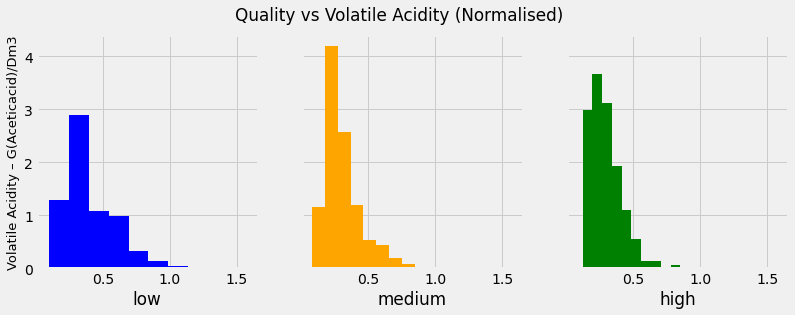

<Figure size 864x288 with 0 Axes>

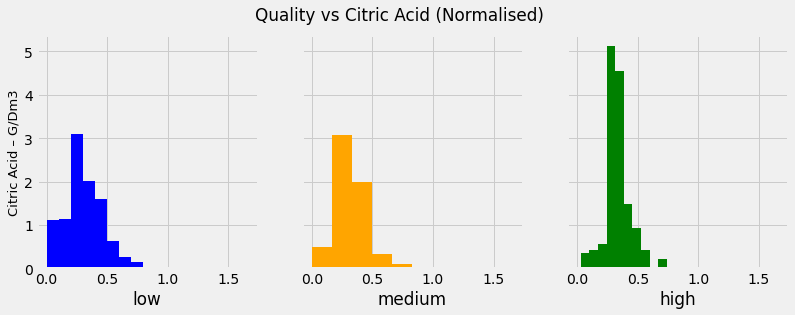

<Figure size 864x288 with 0 Axes>

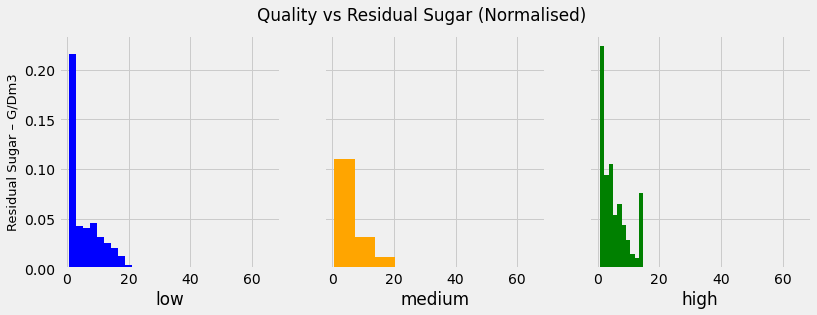

<Figure size 864x288 with 0 Axes>

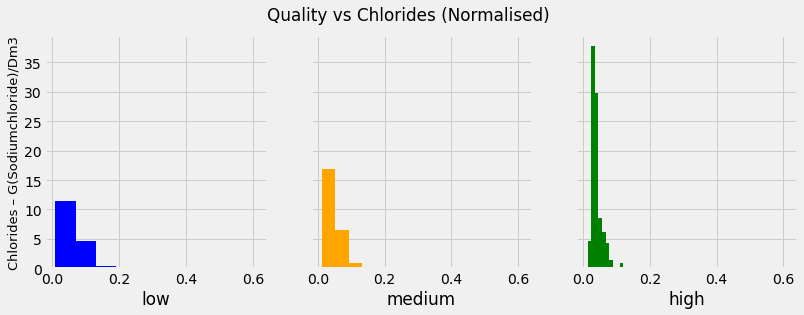

<Figure size 864x288 with 0 Axes>

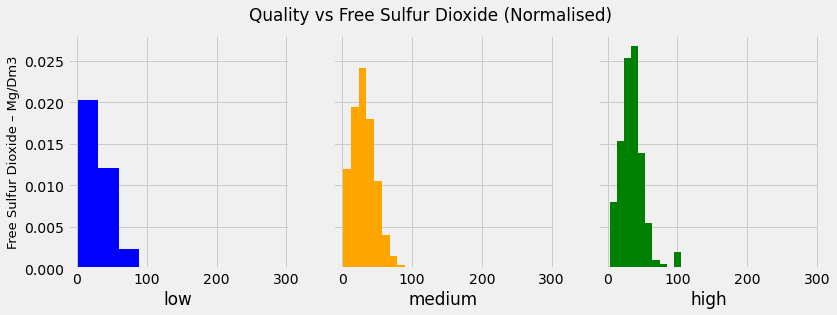

<Figure size 864x288 with 0 Axes>

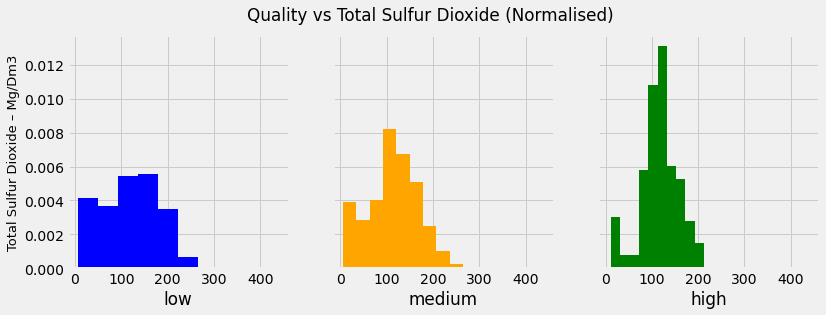

<Figure size 864x288 with 0 Axes>

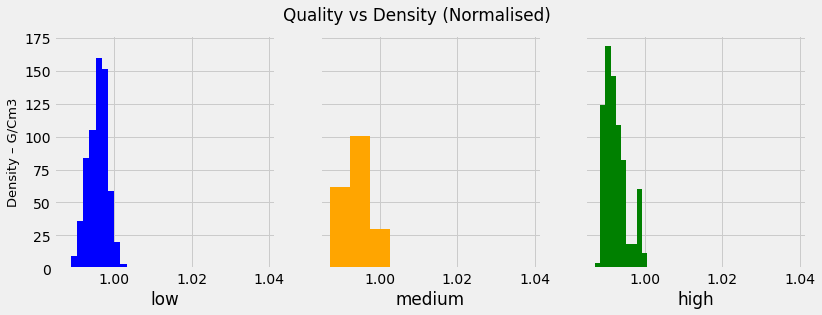

<Figure size 864x288 with 0 Axes>

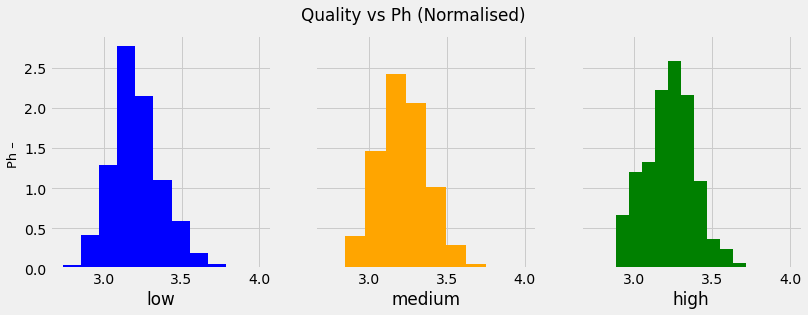

<Figure size 864x288 with 0 Axes>

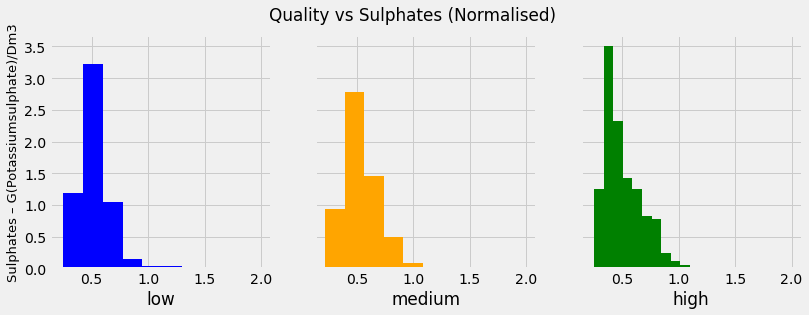

<Figure size 864x288 with 0 Axes>

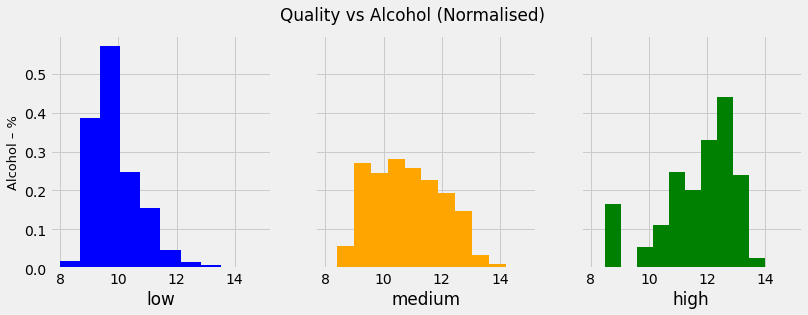

<Figure size 864x288 with 0 Axes>

In [34]:
"""
Now plot a histogram for each feature
"""

for feature in features:
    plot_histograms(feature)

In [35]:
"""
Function for creating box plots. 
Input parameter 1: number of features 
Input parameter 2: list of features

For each feature, the function will plot 
a boxplot for the 'low', 'medium', and 'high' quality wines
"""

def create_box_plots (n, list_of_features):

    # Create three new dataframes by quality
    wines_low = wines[wines['quality_label'] == 'low']
    wines_medium = wines[wines['quality_label'] == 'medium']
    wines_high = wines[wines['quality_label'] == 'high']

    # We want our figure to have (n/2) x 2 subplots.
    fig, ax = plt.subplots(int(n/2)+1, 2, figsize = (20,n*6))                # Maybe come back and modify the figsize
    fig.suptitle('')

    # Initialise list of boxplots
    bps = [0] * n

    # Define list of colours
    colors = ['blue', 'orange', 'green']

    # Dictionary of features (keys) and their units (values)
    feature_units = {'fixed acidity': 'g(tartaricacid)/dm3',
                        'volatile acidity': 'g(aceticacid)/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g(sodiumchloride)/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g(potassiumsulphate)/dm3',
                        'alcohol': '%'
                        }

    for index, feature in zip (range(n), list_of_features):

        if index%2 == 0:
            bps[index] = ax[(index//2), 0].boxplot(
                                                [wines_low[feature], 
                                                wines_medium[feature], 
                                                wines_high[feature]], 
                                                patch_artist = True, 
                                                labels = ['Low', 'Medium', 'High'],
                                                widths = 0.7
                                                )

        else:
            bps[index] = ax[(index//2), 1].boxplot(
                                                [wines_low[feature], 
                                                wines_medium[feature], 
                                                wines_high[feature]], 
                                                patch_artist = True, 
                                                labels = ['Low', 'Medium', 'High'],
                                                widths = 0.7
                                                )

        # Fill each of the three patches (boxes) with a colour                                               
        for patch, color in zip (bps[index]['boxes'], colors):                     
            patch.set_facecolor(color)
        # For each boxplot, customise the markers for the fliers
        for flier in bps[index]['fliers']:                                         
            flier.set(marker = 'D')

        ax[(index//2), index%2].set_xlabel('Quality', fontsize = 13)
        ax[(index//2), index%2].set_ylabel(f'{feature.title()}: {feature_units[feature].title()}', fontsize = 13)
        ax[(index//2), index%2].set_title(f'{feature.title()}', fontsize = 22) 



    plt.tight_layout()
    plt.show()

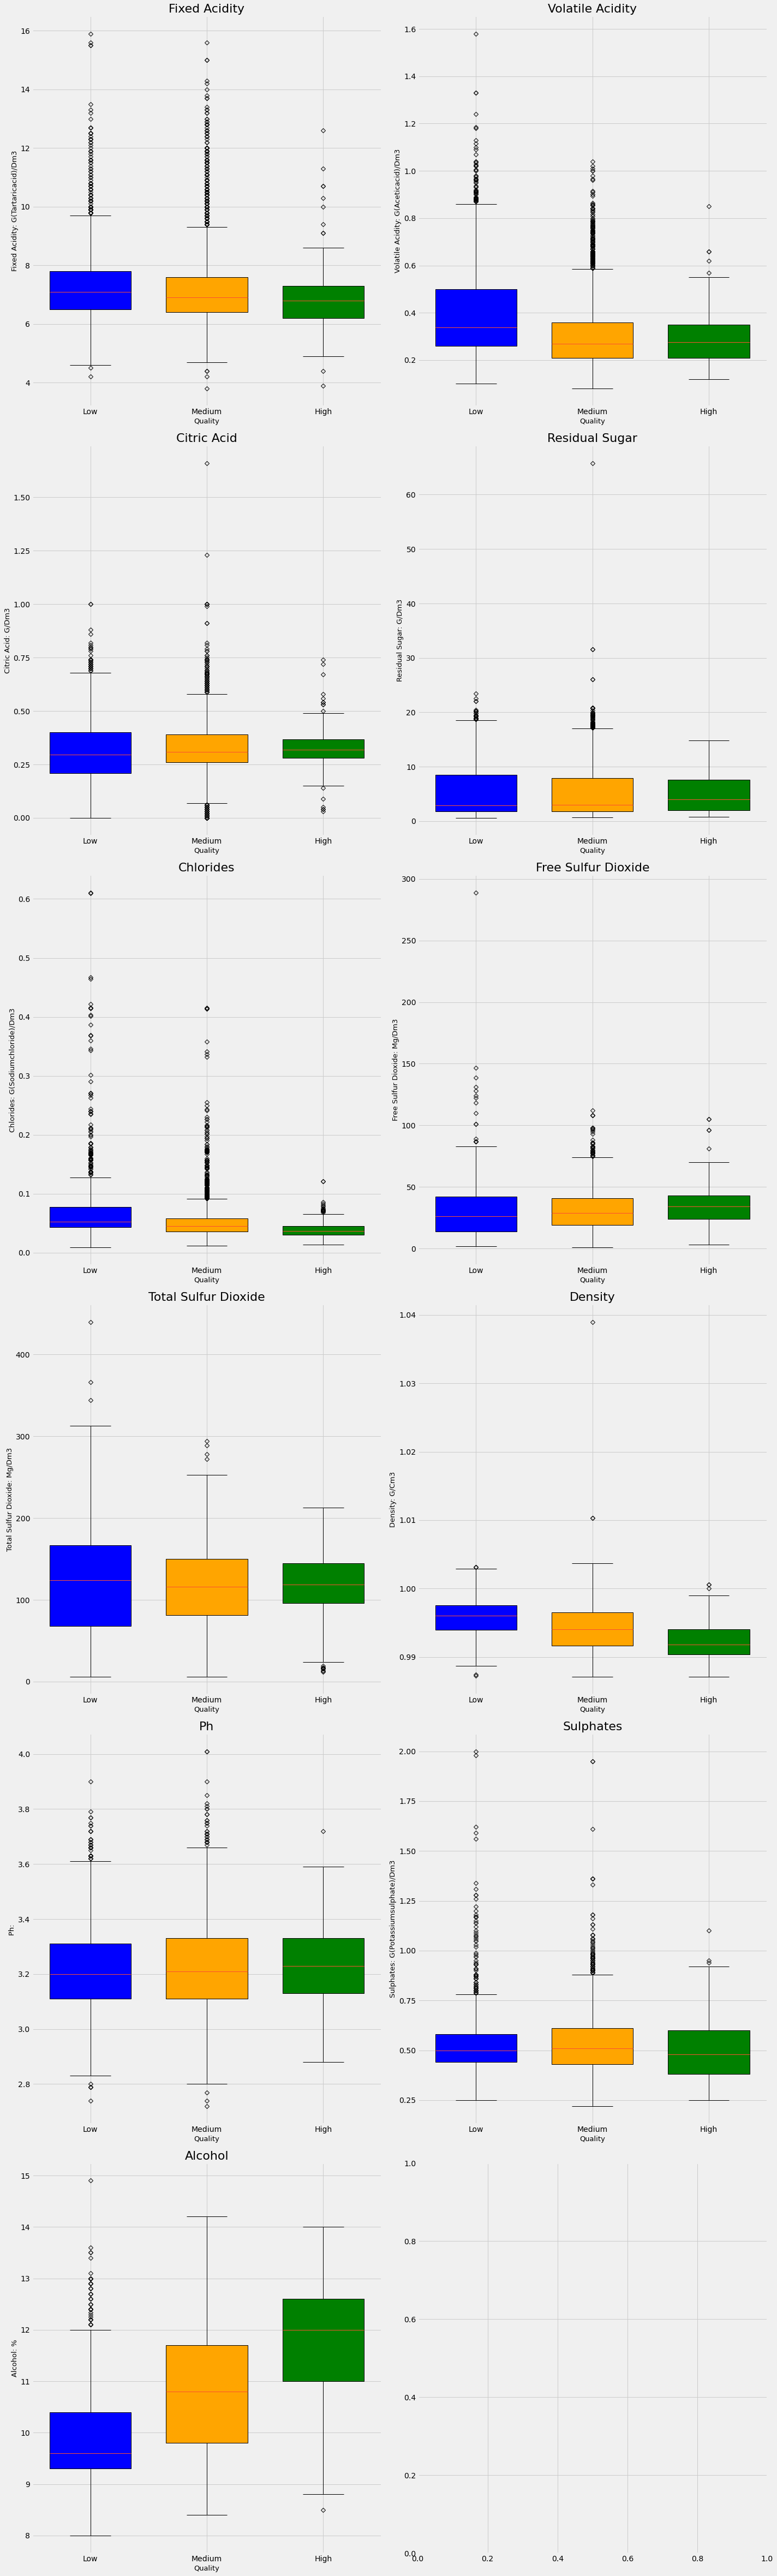

In [36]:
feature_units = {'fixed acidity': 'g(tartaricacid)/dm3',
                        'volatile acidity': 'g(aceticacid)/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g(sodiumchloride)/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g(potassiumsulphate)/dm3',
                        'alcohol': '%'
                        }
create_box_plots (len(feature_units), feature_units)

In [37]:
"""
Now we're going to divide between reds and whites
"""

"\nNow we're going to divide between reds and whites\n"

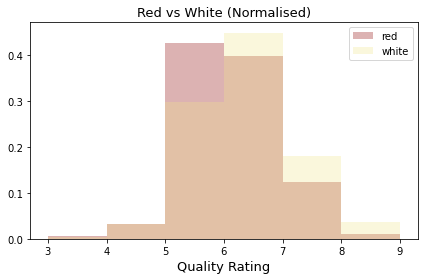

'\nWhite wines tend to have a score of 6 or above\n'

In [13]:
"""
Create histogram for red and white wines (separately)
Quality rating on x axis
"""

fig, ax = plt.subplots()

ax.hist(red_wine['quality'], color = 'DarkRed', 
        density = True,
        label = 'red',
        bins = np.arange(3,10, 1), alpha = 0.3)
ax.hist(white_wine['quality'], color = 'Khaki', 
        density = True, 
        label = 'white',
        bins = np.arange(3,10,1), alpha = 0.3)

ax.set_xlabel ('Quality Rating', fontsize = 13)
ax.set_title('Red vs White (Normalised)', fontsize = 13)
ax.legend()

plt.tight_layout()
plt.show()

"""
White wines tend to have a score of 6 or above
"""

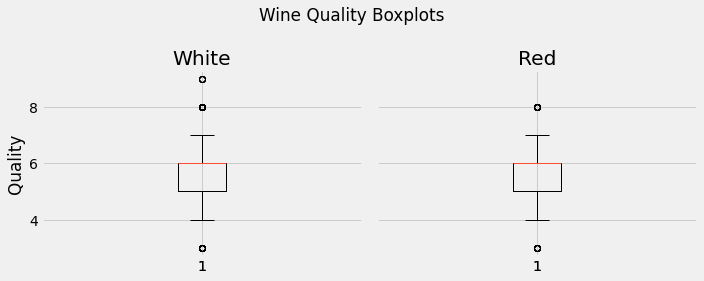

In [39]:

fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (10,4))
plt.suptitle('Wine Quality Boxplots')


bp1 = ax[0].boxplot(white_wine['quality'])
ax[0].set_title('White')
ax[0].set_ylabel('Quality')

bp2 = ax[1].boxplot(red_wine['quality'])
ax[1].set_title('Red')

plt.tight_layout()
plt.show()

In [40]:
"""
Some quick sanity check
"""

print (f"high quality red wines: {red_wine[red_wine['quality']>=8].count()[1]}")
print (f"total number of red wines: {len(red_wine)}")
print (f"high quality white wines: {white_wine[white_wine['quality']>=8].count()[1]}")
print (f"total number of red wines: {len(white_wine)}")

print (f"ratio of high_quality red wines: {round(((red_wine[red_wine['quality']>=8].count()[1]) / len(red_wine))*100, 2)} per cent")
print (f"ratio of high_quality white wines: {round(((white_wine[white_wine['quality']>=8].count()[1]) / len(white_wine))*100, 2)} per cent")

high quality red wines: 18
total number of red wines: 1599
high quality white wines: 180
total number of red wines: 4898
ratio of high_quality red wines: 1.13 per cent
ratio of high_quality white wines: 3.67 per cent


In [41]:
"""
Some more quick sanity check: 
the output should be the same as the output from the above cell.
"""

print (f"high quality red wines: {red_wine[red_wine['quality_label']== 'high'].count()[1]}")
print (f"total number of red wines: {len(red_wine)}")
print (f"high quality white wines: {white_wine[white_wine['quality_label'] =='high'].count()[1]}")
print (f"total number of red wines: {len(white_wine)}")

print (f"ratio of high_quality red wines: {round(((red_wine[red_wine['quality_label']=='high'].count()[1]) / len(red_wine))*100, 2)} per cent")
print (f"ratio of high_quality white wines: {round(((white_wine[white_wine['quality_label']=='high'].count()[1]) / len(white_wine))*100, 2)} per cent")

high quality red wines: 18
total number of red wines: 1599
high quality white wines: 180
total number of red wines: 4898
ratio of high_quality red wines: 1.13 per cent
ratio of high_quality white wines: 3.67 per cent


In [79]:
# Dataframe with all wines, divided into 'low', 'medium' and 'high'
wines_low = wines[wines['quality_label'] == 'low']
wines_medium = wines[wines['quality_label'] == 'medium']
wines_high = wines[wines['quality_label'] == 'high']

# Dataframe with white wines, divided into 'low', 'medium' and 'high'
white_wine_low = white_wine[white_wine['quality_label'] == 'low']
white_wine_medium = white_wine[white_wine['quality_label'] == 'medium']
white_wine_high = white_wine[white_wine['quality_label'] == 'high']

# Dataframe with red wines, divided into 'low', 'medium' and 'high'
red_wine_low = red_wine[red_wine['quality_label'] == 'low']
red_wine_medium = red_wine[red_wine['quality_label'] == 'medium']
red_wine_high = red_wine[red_wine['quality_label'] == 'high']


feature_units = {'fixed acidity': 'g/dm3',
                        'volatile acidity': 'g/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g/dm3',
                        'alcohol': '%'
                        }

In [97]:
"""
Function with one input parameter, the feature name.

Function that plots three subplots in one (1x3) figure. 
Each subplot has three boxplots, with each boxplot 
representing 'low', 'medium' or 'high' quality.
"""

def boxplot_all_white_red (feature):

    fig, ax = plt.subplots(1,3, figsize = (12,4), sharex = True, sharey = True)
    fig.suptitle(feature, fontsize = 16)

    bps = [0, 0, 0]                             # bps will hold three boxplot objects.
    colors = ['blue', 'orange', 'green']        # colours for low, medium, and high qualities.

    bps[0] = ax[0].boxplot(
                                [wines_low[feature], 
                                    wines_medium[feature], 
                                    wines_high[feature]], 
                                    patch_artist = True, 
                                    labels = ['Low', 'Medium', 'High'],
                                    widths = 0.7
                                )
    ax[0].set_title('All', fontsize = 13)
    ax[0].set_xlabel('Quality Label',fontsize = 13)
    ax[0].set_ylabel(f"{feature} – {feature_units[feature]}", fontsize = 13)

    bps[1] = ax[1].boxplot(
                            [white_wine_low[feature], 
                                white_wine_medium[feature], 
                                white_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7
                            )
    ax[1].set_title('White',fontsize = 13)
    ax[1].set_xlabel('Quality Label',fontsize = 13)

    bps[2] = ax[2].boxplot(
                                [red_wine_low[feature], 
                                red_wine_medium[feature], 
                                red_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7
                                            )
    ax[2].set_title('Red',fontsize = 13)
    ax[2].set_xlabel('Quality Label',fontsize = 13)

    for bp in bps:
        for patch, color in zip (bp['boxes'], colors):
                patch.set_facecolor(color)
        for flier in bp['fliers']:
            flier.set(marker = 'D')
    
    return fig, ax
    


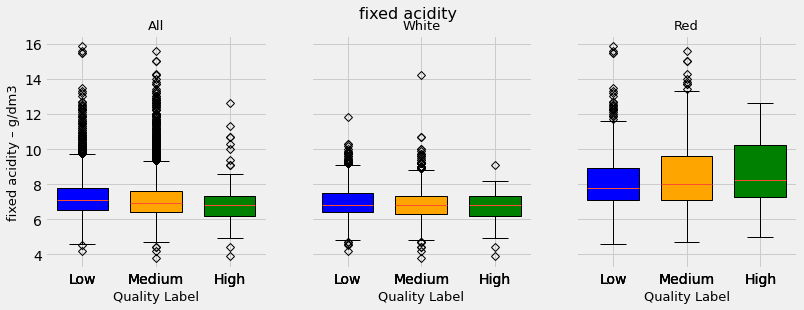

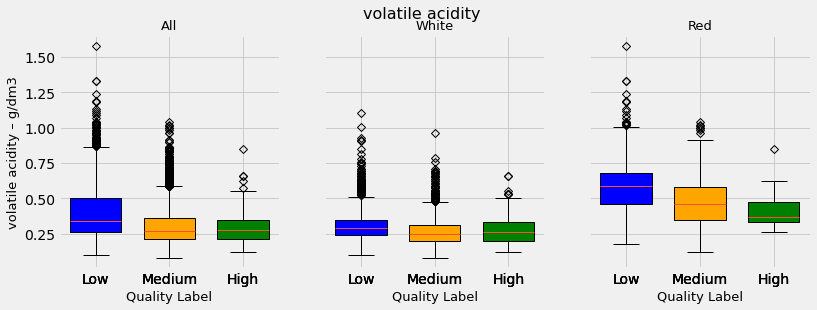

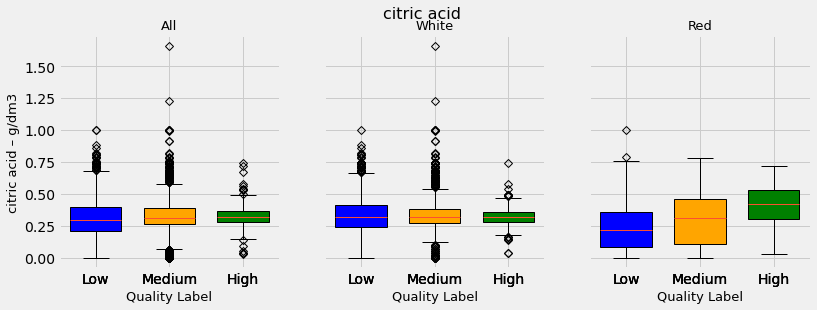

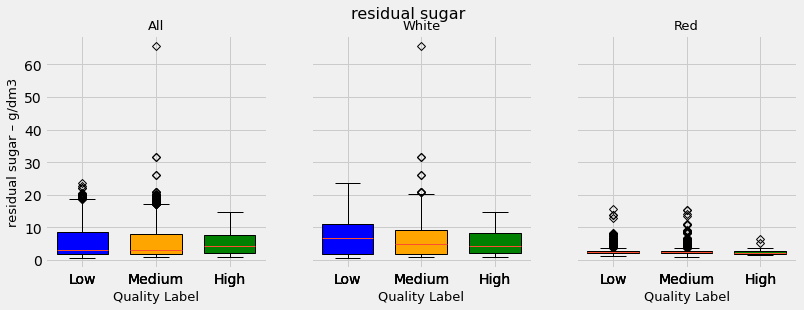

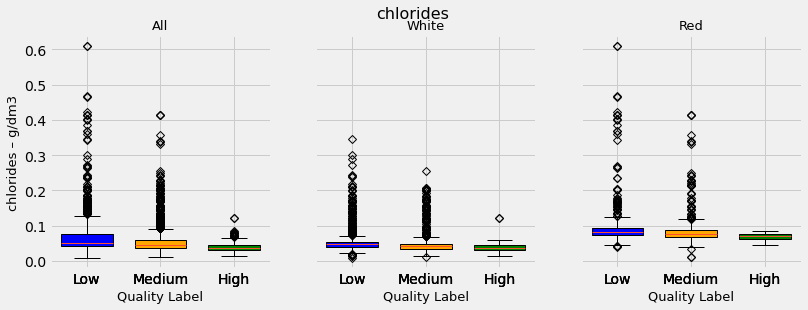

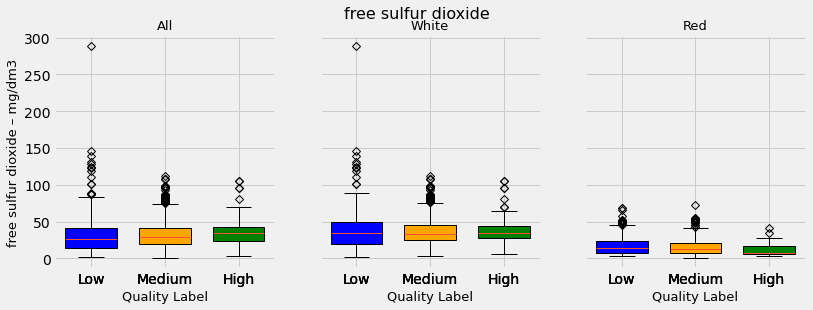

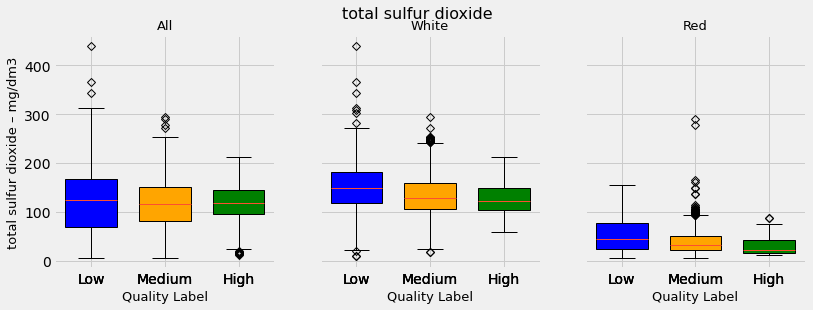

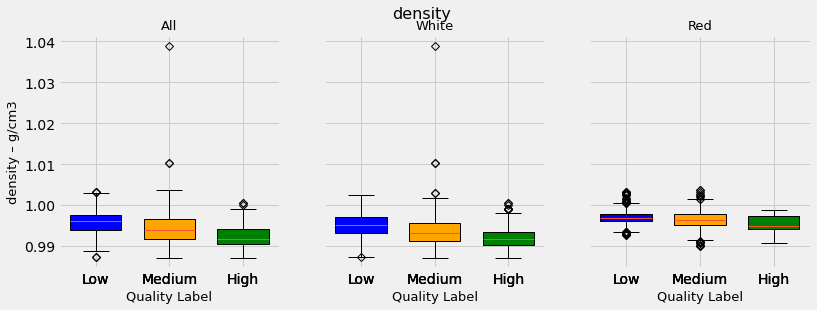

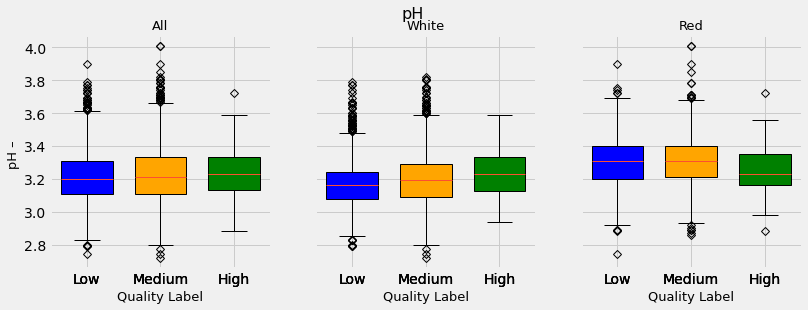

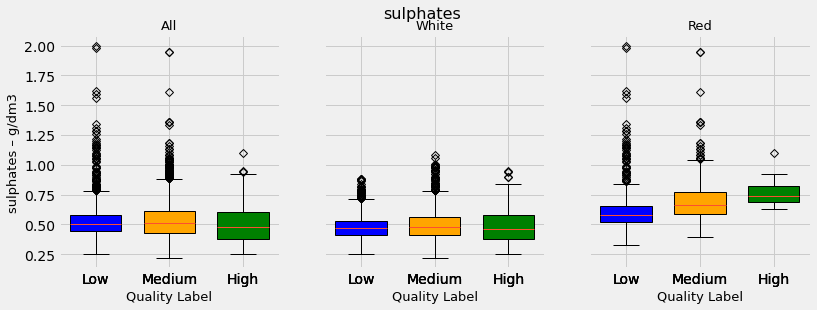

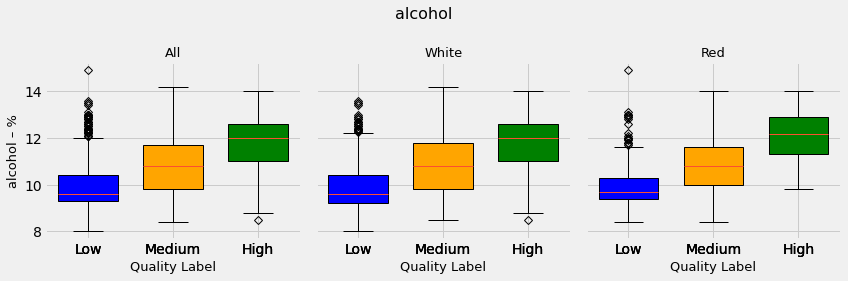

In [98]:
"""
 Now call the boxplot_all_white_red() function for 
all desired features using a for loop
"""

for feature in feature_units:
    boxplot_all_white_red(feature)
plt.tight_layout()
plt.show()


In [ ]:
"""
OK, so separating the reds from the whites gives us a clearer picture. 
The dependence isn't always pronounced to the same degree between the red and white wines. 
Also, the number of outliers isn't always the same between red and white. 
Maybe try creating the same plots, but without the outliers. 
"""

In [99]:
"""
Same function as boxplot_all_white_red,
but modified to ignore outliers. 

(showfliers = False)
"""

def boxplot_all_white_red_ignore_fliers (feature):

    fig, ax = plt.subplots(1,3, figsize = (12,4), sharex = True, sharey = True)
    fig.suptitle(feature, fontsize = 16)

    bps = [0, 0, 0]                             # bps will hold three boxplot objects.
    colors = ['blue', 'orange', 'green']        # colours for low, medium, and high qualities.

    bps[0] = ax[0].boxplot(
                                [wines_low[feature], 
                                    wines_medium[feature], 
                                    wines_high[feature]], 
                                    patch_artist = True, 
                                    labels = ['Low', 'Medium', 'High'],
                                    widths = 0.7,
                                    showfliers = False
                                )
    ax[0].set_title('All', fontsize = 13)
    ax[0].set_xlabel('Quality Label',fontsize = 13)
    ax[0].set_ylabel(f"{feature} – {feature_units[feature]}", fontsize = 13)

    bps[1] = ax[1].boxplot(
                            [white_wine_low[feature], 
                                white_wine_medium[feature], 
                                white_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7,
                                showfliers = False
                            )
    ax[1].set_title('White',fontsize = 13)
    ax[1].set_xlabel('Quality Label',fontsize = 13)

    bps[2] = ax[2].boxplot(
                                [red_wine_low[feature], 
                                red_wine_medium[feature], 
                                red_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7,
                                showfliers = False
                                            )
    ax[2].set_title('Red',fontsize = 13)
    ax[2].set_xlabel('Quality Label',fontsize = 13)

    for bp in bps:
        for patch, color in zip (bp['boxes'], colors):
                patch.set_facecolor(color)
        for flier in bp['fliers']:
            flier.set(marker = 'D')
    
    return fig, ax

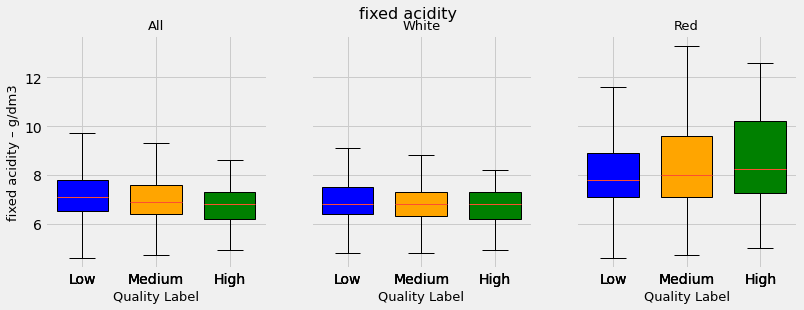

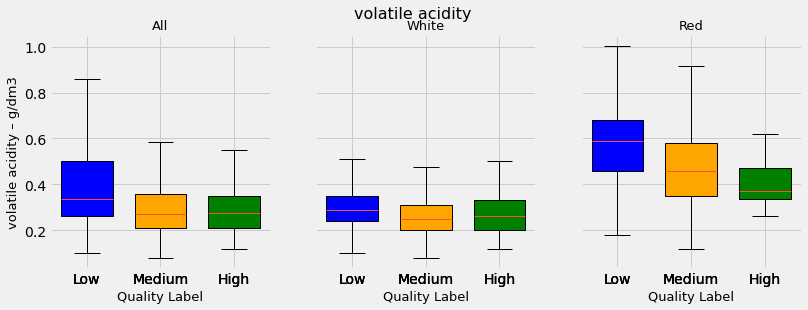

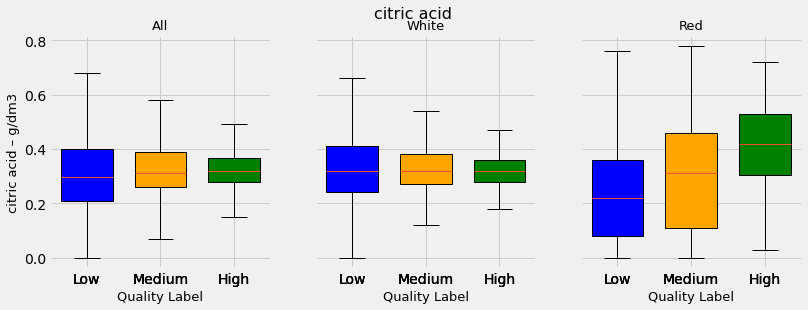

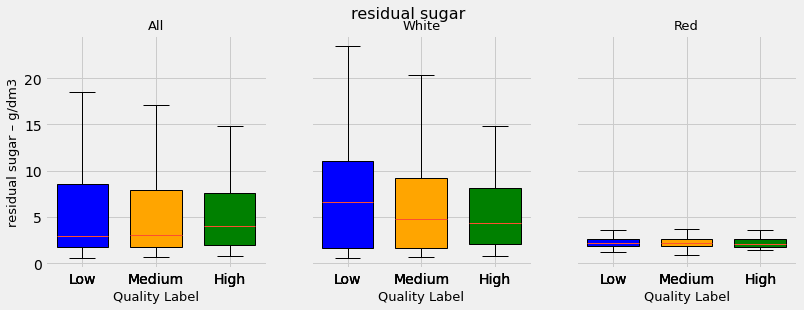

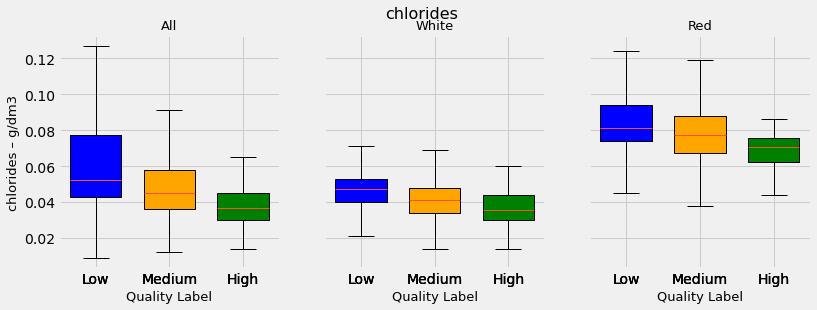

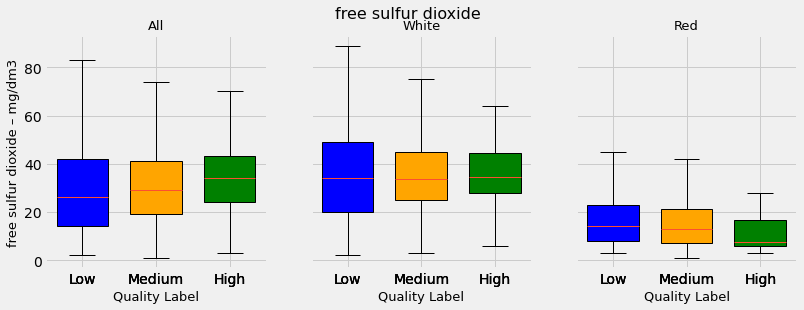

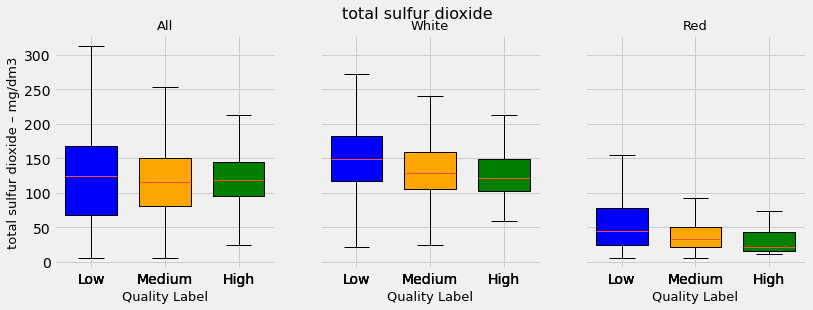

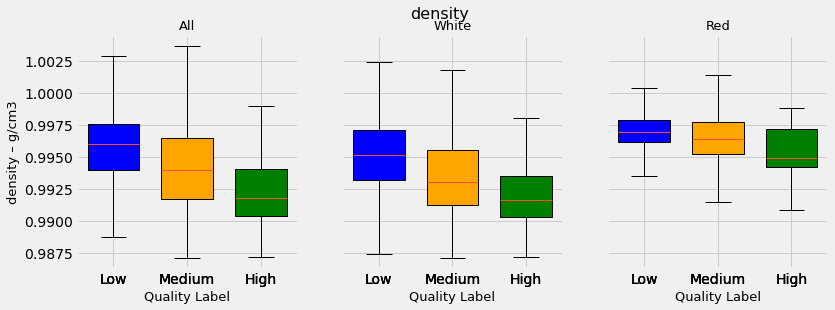

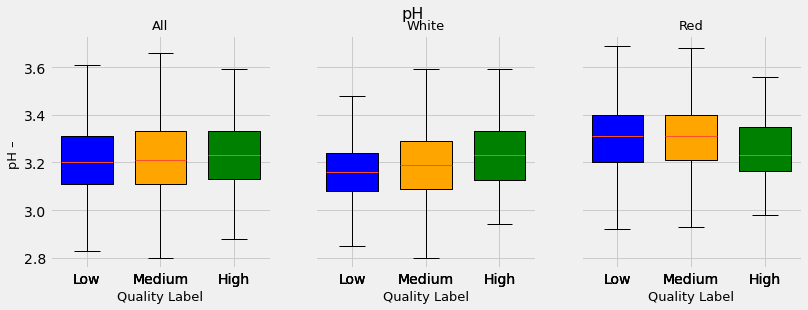

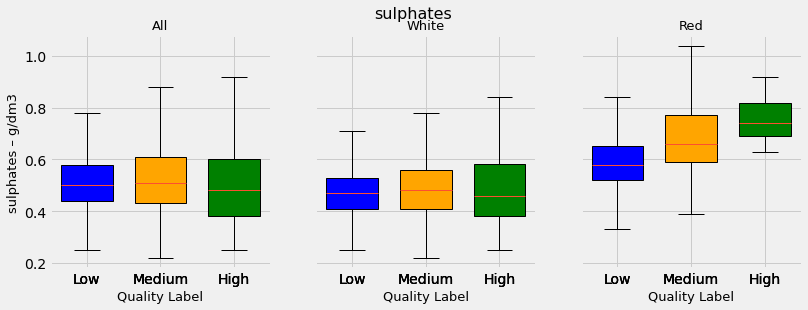

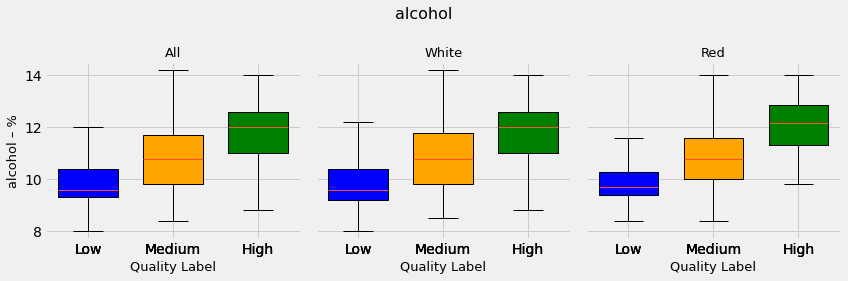

In [100]:
"""
 Now call the boxplot_all_white_red_ignore_fliers() function for 
all desired features using a for loop
"""

for feature in feature_units:
    boxplot_all_white_red_ignore_fliers(feature)
plt.tight_layout()
plt.show()